# Assignment 4 

In this assignment you will use all three topics covered in the unit, to simulate a type of particle detector known as a drift chamber.

Each part of the assignment can be completed separately, other than the final one where the individual pieces are drawn together. Each part includes necessary background information, followed by some instructions about how to write the code.  Please play particular attention to these sections.

You are expected to use numpy and scipy libraries wherever possible. You will not gain extra marks for writing your own implementation of routines that can be found in numpy/scipy.

The assignment is deliberately open ended, and there are a wide range of extensions that you can explore if you wish - please discuss with your demonstrator or the unit director.

## Introduction - The Drift Chamber

The drift chamber is a type of gas detector used to detect ionising radiation.  It is a variant of the "multi-wire proportional chamber", which was invented by Georges Charpak in 1968, and for which he won the Nobel Prize in 1992.

The basic device is a chamber containing an array of anode wires, as shown in the figure below.  The wires are held at a high voltage with respect to a cathode plate on the other side of the chamber. The chamber is filled with a gas (or sometimes a liquid).  When an ionising particle enters the chamber, it will ionise the gas, producing electrons and positive ions.  The electrons will drift in the electric field, until they reach a wire, which produces a signal that can be measured. By using an array of wires, and precisely recording the time at which a signal arrives, the position of the initial charge can be reconstructed in 2D.  The positive charge will also drift onto the cathode plate, but in this type of chamber, is not recorded.

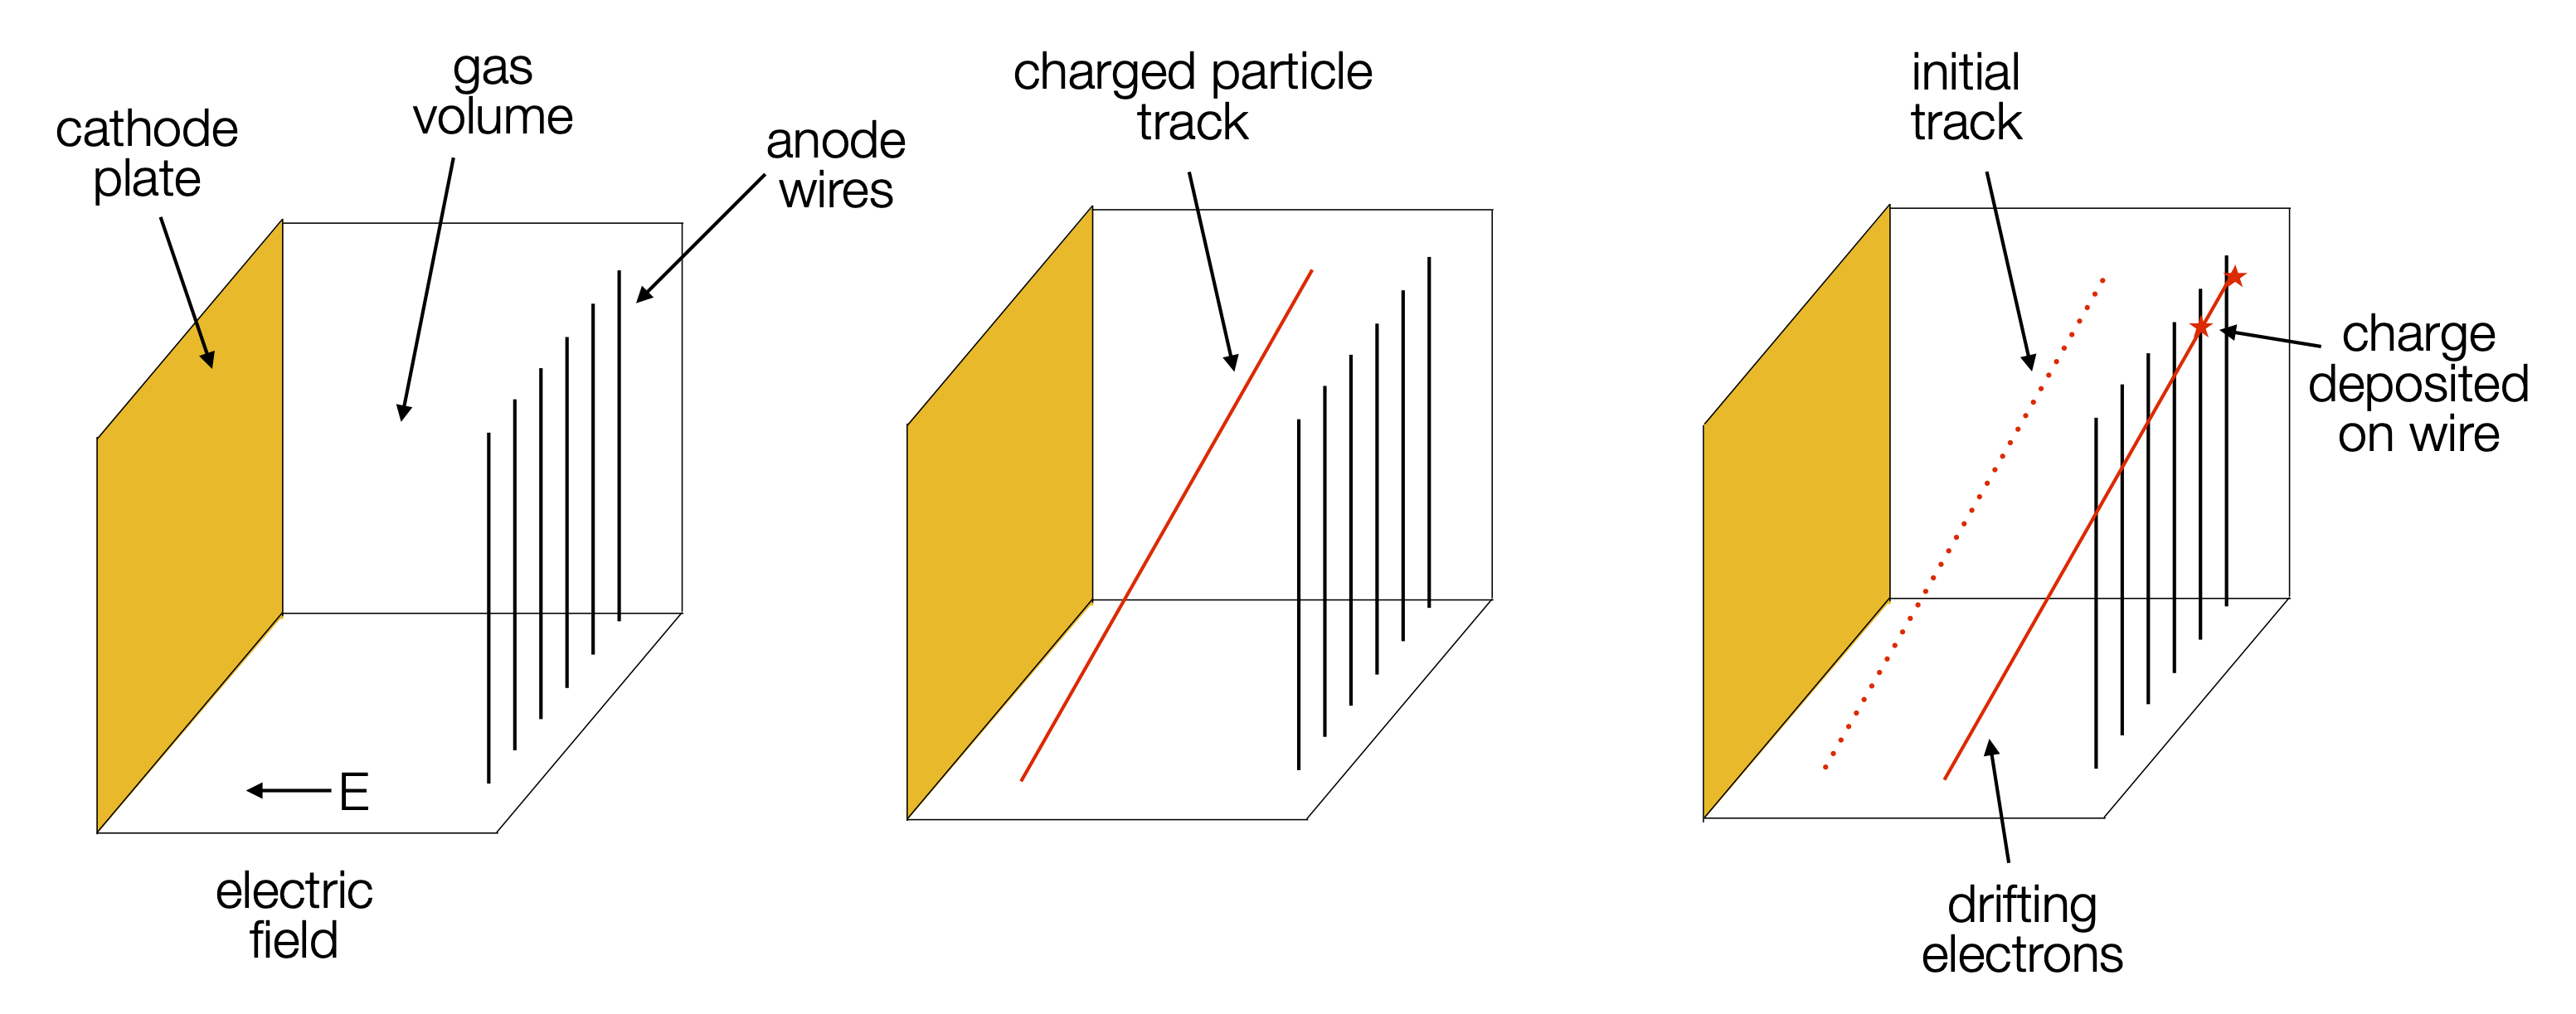

Below is an animation showing the operating principle of a drift chamber. (This particular chamber is a liquid Argon time-projection chamber, in which multiple arrays of wires are used to reconstruct the particle track in 3D.  However the principle is the same as the gaseous Ar detector we will simulate her).

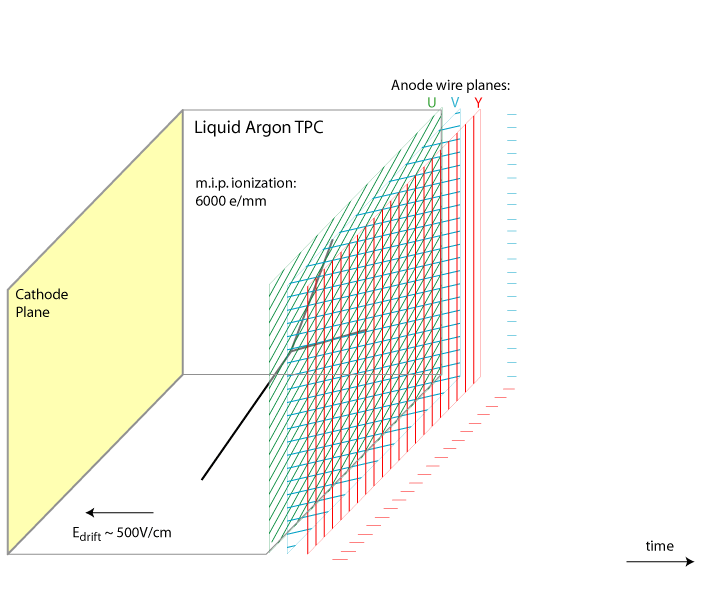

The particular setup you should simulate is shown in the figure below.

<div>
    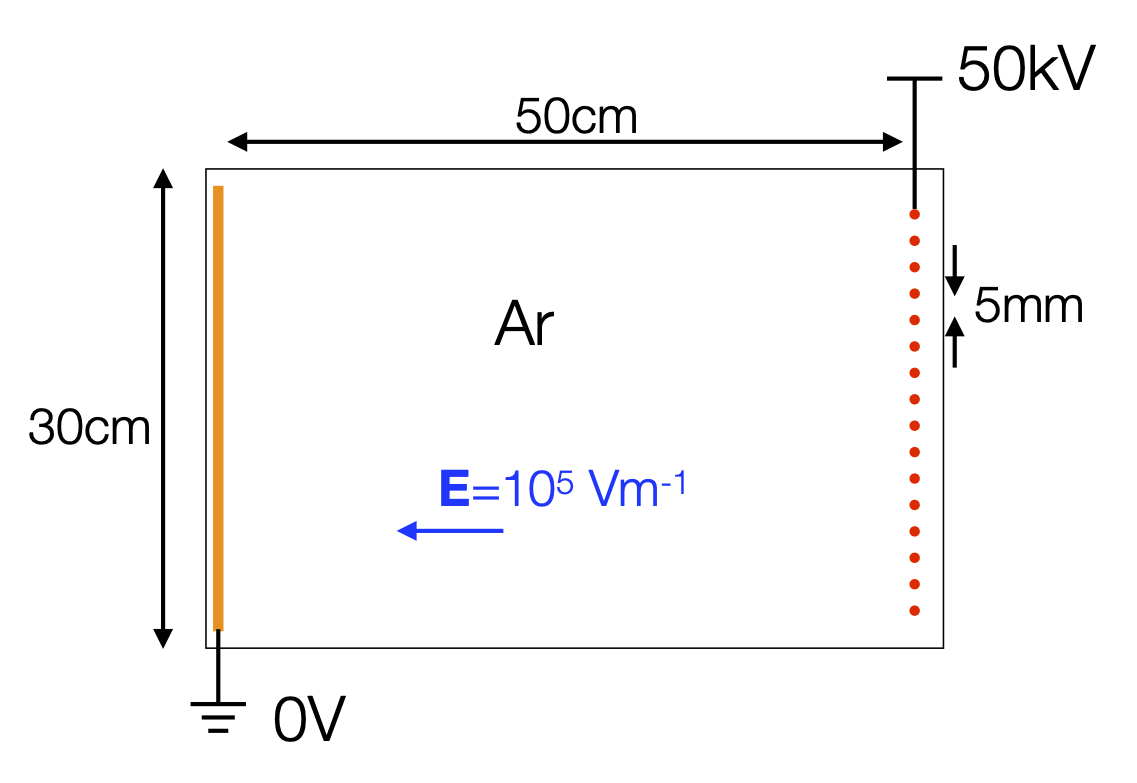
</div>

You can assume the Ar is at normal temperature and pressure (NTP : 293 K, 101 kPa), with electron diffusivity $D = 0.1 \: {\rm m^2s^{-1}}$, electron mobility $\mu=50 \: {\rm m^2V^{-1}s^{-1}}$, and total ionisation (for a cosmic ray muon) of $N_t = 9.4\times10^3$ electrons ${\rm m^{-1}}$. THe electric field within the chamber is $E=10^5 \: {\rm Vm}^{-1}$.

For parts 2-4 we will need to model the distribution of charge in the detector using a discrete grid.  It is suggested you start with a grid spacing of 0.1cm, which will allow your code to execute reasonably quickly.  Once your code is running, you may wish to decrease the grid spacing.

## Part 1 - Cosmic Ray Generation

In order to simulate the response of the detector, we need a simulation of the incoming particles. Here we will consider cosmic rays, which we will simulate using a Monte Carlo method.

At the Earth's surface, cosmic rays are essential all muons.  To a good approximation, they have a distribution in zenith angle $\theta$ which is proportional to ${\rm cos}^2(\theta)$, and are uniform in polar angle $\phi$. We can assume they are uniformly distributed in the horizontal plane.

If the energy of the cosmic muon needs to be modelled, the distribution can be very crudely approximated in units of GeV/C by a log-normal distribution with $\mu=6.55$ and $\sigma=1.8$.  If the charge needs to be modelled, cosmic rays at the Earth's surface comprise approximately 30% more $\mu^+$ than $\mu^-$.

### Writing the code

Write a function that will randomly generate a cosmic ray muon each time it is called.  The function should return at least a direction in 3D, given the above distributions, as well as a starting position on a user definable horizontal plane.  Show that your function produces the desired distributions, at least qualitatively, by calling it for a large number of trials.

In [14]:
# write a function here to generate a cosmic ray
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

'''Code to generate the angles and starting position
    required to simulate a random muon path in a chamber.'''

# Defining dimensions of the chamber 
w, h, d = 50, 20, 50

# Generates random zenith angle 
# Uses accept/reject method for number to be generated according to cos squared distribution
# Outputs zenith angle 
def rand_zenith():
    while True:
        x = np.pi * 1.5 *  np.random.random()
        y = np.random.random()
        
        if y < np.cos(x)**2:
            return x
        else:
            continue
            
# Generates random azimuth angle
# Uses np.random.random to generate numbers
# Outputs azimuth angle
def rand_azimuth():
    x = 2 * np.pi * np.random.random()
    return x

# Generates a random starting coordinate in the chamber
# i.e. where the muon enters the chamber
# Ouputs the x and y coordinates
def starting_coordinate():
    x = np.random.random()*w
    y = np.random.random()*h
    
    return x,y

# Generates muon path by combining zenith, azimuth and starting coordinate
# Inputs size which determines array size
# Outputs arrays of coordinates (x_vals, y_vals, z_vals), starting coordinates, and size
def generate_path(size):
    x,y = starting_coordinate()
    zen = rand_zenith()
    azi = rand_azimuth()
    
    x_vals = np.zeros(size)
    y_vals = np.zeros(size)
    z_vals = np.linspace(0,d,size)
    
    for i in range(size):
        
        x_vals[i] = x + z_vals[i] * np.tan(zen) * np.cos(azi)
        y_vals[i] = y + z_vals[i] * np.tan(zen) * np.sin(azi)
        if not (0 < x_vals[i] < w and 0 < y_vals[i] < h):
            x_vals = x_vals[:i]
            y_vals = y_vals[:i]
            z_vals = z_vals[:i]
            break
            
            
    return x_vals, y_vals, z_vals, x, y, size



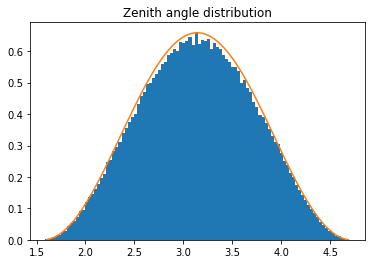

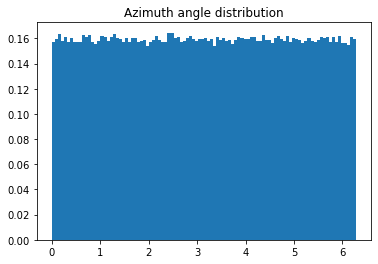

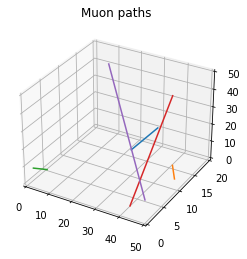

In [15]:
# write some code here to test the function above
'''Generating graphs to check the probabilty distribution of previous section '''

# get range of zenith and azimuth angles
zenith = [rand_zenith() for i in range(500000)]
azimuth = [rand_azimuth() for i in range(500000)]

# Zenith angle only between pi/2 and 3pi/2 
zenith = np.array(zenith)
zenith = zenith[(zenith >= np.pi/2)]

# Histogram for zenith angle distribution
hist_zenith, bins_zenith, pathches_zenith = plt.hist(zenith, bins=100, density=True)
bin_centres = (bins_zenith[1:] + bins_zenith[:-1])/2
plt.plot(bin_centres, hist_zenith.max()*np.cos(bin_centres)**2)
plt.title("Zenith angle distribution")
plt.show()

# Histogram for azimuth angle distribution 
hist_azimuth, bins_azimuth, patches_azimuth = plt.hist(azimuth, bins=100, density=True)
plt.title("Azimuth angle distribution")
plt.show()

# Build muon grid
path = plt.figure()
muon_path = path.add_subplot(111,projection='3d')
muon_path.set_xlim3d(0,w)
muon_path.set_ylim3d(0,h)
muon_path.set_zlim3d(0,d)

# Generate 5 different muon paths 
for i in range(5):
    x_vals, y_vals, z_vals, x, y, size = generate_path(50)
    muon_path.plot(x_vals, y_vals, z_vals)
    
plt.title("Muon paths")    


plt.show()
    

This section of the code generates a starting position and direction for a muon travelling into a drift chamber. The zenith angle dictates at which direction away from the ceiling the muon is travelling. The probabilty distribution function for this angle is cos squared and to acheive this is the number generation a accept and reject method is implemented from which values are rejected if they do not fit a certain critrea i.e <cos^2(x). The cos squared distribution of the zenith angle is shown in the first graph between values pi/2 and 3pi/2 as we do not want the muon travelling backwards. 

The azimuth angle represents the angle the muon is travelling parallel to ceiling so can travel in any direction on a circle around the starting point (or at least this is how i have thought of it). The azimuth has a equal probabilty of going in any direction as shown by the second graph. This has been coded by simply by using numpy.random.random to get a random value between 0 and 1 and then multiplying by 2 pi to convert to a angle in radians.

To generate the starting coordinates uses the same module as before for a random number between 0 and 1 and the multiplied by the specified dimensions of the chamber to give x and y coordinates.

Finally, to generate the path the muon travels upon the 3 functions described above are called upon to dictate a starting position and direction and then a iterative loop is used to calculate the new cooridnate in each cell and then stops when reaching the limits of the chamber with a if statement. Then 5 random muon paths are generated in the final 3D plot.



## Part 2 - Ionisation

When a charged particle, such as a cosmic ray muon, traverses the wire chamber, it will ionise gas molecules. In order to model this ionisation, we can assume the muon loses negligible energy while traversing the detector, and liberates a fixed number of electrons per unit distance. For the Ar in the drift chamber we are modelling, you can assume 94 electrons are liberated per cm.  (A more sophisticated extension would use a Monte Carlo method to model variations in the number of liberated electrons as the muon traverses the chamber.)

### Writing the code

You should write a function which takes the starting position and direction of a randomly generated cosmic ray as input, and returns a 2D array representing the initial ionisation caused by the cosmic ray.  In order to achieve this, you may wish to first write a function which calculates the length of a track traversing a grid cell, given the track parameters and grid cell location. You should test your code by generating a few cosmic rays and plotting the resulting charge distribution.

In [16]:
'''Functions to generate electron density path and heat map according to a given muon path'''


# Function to generate the grid which represents a layer of the chamber
# Scans through each cell and if the ray path is detected determines a random electron density
# for each cell
# Outputs the complete heatmap distribution of electron density
def create_plot(heatmap):
    x_vals, y_vals, z_vals, x, y, size = generate_path(100)  
    
    muon_3D.plot3D(x_vals,y_vals,z_vals)
    muon_2D.plot(x_vals,z_vals)
    
    for i in range(len(heatmap)):
        for j in range(len(heatmap[0])):
            for k in range(len(x_vals)):
                if int(x_vals[k])==j and int(z_vals[k])==i:
                    heatmap[i][j] = heatmap[i][j] + electron_density(x_vals, y_vals, z_vals, x, y, k)
        bar = muon_heatmap.imshow(heatmap,cmap='gnuplot2',interpolation='bilinear')
    return heatmap,bar
    
                
# Calculates the electron density in each cell
# Uses Pythagorus to calculate length of path in cell then predicts random number of electrons
# according to distribution
# Inputs x, y, z arrays with path data, x, y as the starting positions and k the current step
# Outputs the electron density for specfic cell
def electron_density(x_vals, y_vals, z_vals, x, y, k):
    density, dr = 0, 0
    if k+1 < len(x_vals):
        r1 = ((x_vals[k]-x)**2+(y_vals[k]-y)**2+(z_vals[k])**2)**0.5
        r2 = ((x_vals[k+1]-x)**2+(y_vals[k+1]-y)**2+(z_vals[k+1])**2)**0.5
        dr = r2-r1
        density = int(dr*np.random.normal(93,4))
    elif k == len(x_vals):
        r1 = ((x_vals[k-1]-x)**2+(y_vals[k-1]-y)**2+(z_vals[k-1])**2)**0.5
        r2 = ((x_vals[k]-x)**2+(y_vals[k]-y)**2+(z_vals[k])**2)**0.5    
        dr = r2-r1
        density = int(dr*np.random.normal(93,4))
    return density


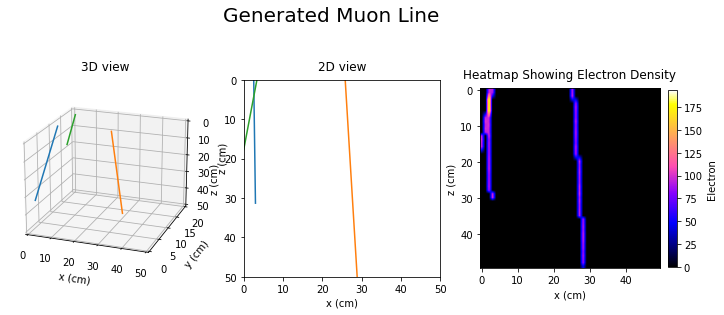

In [17]:
# write some code here to test the above function
'''Building graphs for a randomly generated muon path and its 
        correspoinding initial electron ionisation'''


    
fig = plt.figure(figsize=(12,5))

fig.suptitle('Generated Muon Line', fontsize=20)

cmap = matplotlib.cm.get_cmap('gnuplot2')  


muon_3D = fig.add_subplot(1, 3, 1,projection='3d')
muon_3D.set_xlim(0,w)
muon_3D.set_ylim(0,h)
muon_3D.set_zlim(d,0)
muon_3D.view_init(20,290)
muon_3D.set_xlabel('x (cm)')
muon_3D.set_ylabel('y (cm)')
muon_3D.set_zlabel('z (cm)')
muon_3D.set_title('3D view', pad=10)


muon_2D = fig.add_subplot(1,3,2)
muon_2D.axis('scaled')
muon_2D.set_xlim(0,w)
muon_2D.set_ylim(d,0)
muon_2D.set_xlabel('x (cm)')
muon_2D.set_ylabel('z (cm)')
muon_2D.set_title('2D view' , pad=10)


muon_heatmap = fig.add_subplot(1,3,3)

muon_heatmap.set_xlabel('x (cm)')
muon_heatmap.set_ylabel('z (cm)')
muon_heatmap.set_title('Heatmap Showing Electron Density', pad=10)

heatmap1 = np.zeros((w,d))
for i in range(3):
    density, bar = create_plot(heatmap1)

norm = matplotlib.colors.Normalize(vmin=np.amax(density), vmax=np.amin(density))
scm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(bar, label="Electron", ax=muon_heatmap, fraction=0.045, pad=0.04)
plt.show()



For the building of the heatmap I created a 2D array which represented real cells within the chamber. So to convert the array of coordinates into a 2D grid of which each value describe how much of the ray is in that cell and then from that calculates the number of electrons ionised.

The code cycles through a 3 stage iterative loop going through i,j,k index covering the entire grid. Then using a if statement it determines whether the ray is present if the ray is present then the electron density calculator function is called.

In the electron density function 3 dimensional pythagorus is used on 2 cooridnates to calculate a length within that cell this length is then multipled by the number of electrons which is determined by a random.normal function as the number of ionised electrons is not constant. This value is then placed in the 2D array to be put on the heatmap.

The diagrams above show 3 different muons and their paths and their corresponding electron ionisation within the chamber.

# Part 3 - Drift-Diffusion

The charge produced by ionisation will drift towards the anode wires, where it can be detected.  However, it will also diffuse in the gas.  These two 'transport' processes are described by the drift-diffusion equation  :

$$\frac{\partial q}{\partial t} = D \nabla^2 q - \frac{1}{\mu} {\bf E} \cdot (\nabla q)$$

Here, $q(x,y)$ represents the charge distribution in 2D.  The first term on the RHS represents diffusion, the second represents the charge drift under the influence of the electric field.

By expanding in terms of (x,y) this can be written :

$$\frac{\partial q}{\partial t} = D\frac{\partial^2 q}{\partial x^2} + D\frac{\partial^2 q}{\partial y^2} - \frac{E_x}{\mu}\frac{\partial q}{\partial x} - \frac{E_x}{\mu}\frac{\partial q}{\partial y}$$

For the diffusion terms, we will use the same implicit finite difference scheme described in lectures and the previous assignment, but expanded to 2D.  For the drift terms, we will use the 1st order backward difference, also known as the "upwind" scheme (since the backward difference is "upwind" of the electrostatic force direction).  There are other choices (eg. the 2nd order centred difference) but these are prone to non-physical oscillations.

The full finite difference equation is then :

$$\frac{q^{n+1}_{i,j} - q^n_{i,j}}{\tau} = D\frac{q^{n+1}_{i-1,j} - 2q^{n+1}_{i,j} + q^{n+1}_{i+1,j}}{h^2} + D\frac{q^{n+1}_{i,j-1} - 2q^{n+1}_{i,j} + q^{n+1}_{i,j+1}}{h^2} - \frac{E_x}{\mu}\frac{(q^{n+1}_{i,j}- q^{n+1}_{i-1,j})}{2h} - \frac{E_y}{\mu}\frac{(q^{n+1}_{i,j}-q^{n+1}_{i,j-1})}{2h}$$

But we can simplify this by assuming the electric field is uniform and non-zero in the x-direction only :

$$q^n_{i,j} = - \alpha q^{n+1}_{i-1,j} - \alpha q^{n+1}_{i+1,j} - \alpha q^{n+1}_{i,j-1} - \alpha q^{n+1}_{i,j+1} + (1+4\alpha) q^{n+1}_{i,j} - \beta q^{n+1}_{i-1,j} + \beta q^{n+1}_{i,j}$$

where $\alpha = \frac{D \tau}{h^2}$ and $\beta = \frac{\tau E}{2\mu h}$.

Or collecting terms relating to the same node :
$$q^n_{i,j} = ( - \alpha- \beta) q^{n+1}_{i-1,j} - \alpha q^{n+1}_{i+1,j} - \alpha q^{n+1}_{i,j-1} - \alpha q^{n+1}_{i,j+1} + (1+4\alpha+\beta) q^{n+1}_{i,j}$$

This is an implicit equation, expressing $q^n$ in terms of $q^{n+1}$ for a node and its neighbours. Just as for the 1D diffusion problem, we will need to solve the equation for each timestep, and iterate.

And again just like the 1D diffusion problem, we can represent this finite difference equation as a matrix.  However, there is an added complication because we now have a 2D grid.  What we have to do is represent each node in the 2D grid systematically as a row (or column) of the matrix.  This means if we have a grid of size $n_i \times n_j$, the matrix will need to be $n_i n_j \times n_i n_j$.  One way of systematically mapping nodes onto rows/columns of the matrix is to use "row-major ordering", where the matrix index $k$ corresponding to grid node $(i,j)$ is $k = n_ij + i$.

Assuming the 2D grid is stored in a row-major ordered vector, then we can write the finite difference equation as a matrix equation :
$$q^n = M q^{n+1}$$

For a small example, if $n_i=n_j=4$, then matrix M is $16 \times 16$ and its top-left quadrant ($8 \times 8$) is  :

$$M = \pmatrix{
1+4\alpha+\beta & -\alpha &  &  & -\alpha  &  &  &  & \\
-\alpha-\beta & 1+4\alpha+\beta & -\alpha &  &  & -\alpha &  &  & \\
 & -\alpha-\beta & 1+4\alpha+\beta & -\alpha &  &  & -\alpha &  & \\
 &  & -\alpha-\beta & 1+4\alpha+\beta & -\alpha &  &  & -\alpha & \\
-\alpha &  &  & -\alpha-\beta & 1+4\alpha+\beta & -\alpha &  &  & \\  
  & -\alpha &  &  & -\alpha-\beta & 1+4\alpha+\beta & -\alpha &  & \\  
  &  & -\alpha &  &  & -\alpha-\beta & 1+4\alpha+\beta & -\alpha & \\
  &  &  & -\alpha &  &  & -\alpha-\beta & 1+4\alpha+\beta & \\
}$$

And the diagonals continue into the remaining quadrants.  This is a "tri-diagonal matrix with fringes".  It comprises five diagonal elements corresponding to the five terms in the previous equation.  The tri-diagonal part corresponds to the terms for $(i-1, j)$, $(i,j)$ and $(i+1, j)$ while the fringes are the terms for $(i, j-1)$ and $(i, j+1)$.  In terms of the matrix coordinate $k$, the fringe diagonals start at $(0,n_i)$ and $(n_i,0)$.

In the absence of additional terms, the matrix equation above possesses a "periodic boundary condition".  Effectively, this means any charge leaving the grid on one edge will re-appear on the opposite edge, which is adequate for our purposes here.

### Writing the code

Solving the 2D drift-diffusion equation is conceptually similar to the 1D diffusion equatino you have already encountered.  The differences are : the changes needed to handle a 2D grid of nodes, and the $\beta$ term in the matrix M to accomodate charge drift.

First you will need to write a function that will create the matrix M. You should verify that this function produces the desired matrix for a simple test case.

Next,  write a function which iteratively solves the matrix equation $q^n = M q^{n+1}$ for each timestep, using an appropriate routine from scipy.  This function should take a 2D array of the charge distribtuion as input. However, you will need to convert this to a 1D array in order to solve the matrix equation.  **Hint** : You can use `ndarray.flatten()` to convert a 2D array into a row-major ordered 1D array, and you can use `ndarray.reshape(ny, nx)` to convert a 1D row-major ordered array back into a 2D array.

You should test your code with a simple test case, eg. an initial point charge.  You may wish to also examine the behaviour under 'diffusion only' and 'drift only' conditions, ie. with E or D set to zero.

As stated in the introduction, for Argon at NTP you can assume $D=0.1$, $\mu=50 \: {\rm m^2V^{-1}s^{-1}}$ and $E=10^5 \: {\rm Vm}^{-1}$. Given these values, an appropriate run time is $\mathcal{O}(10^{-4}) \: {\rm s}$.    

In [18]:
# write a function here to generate the drift-diffusion matrix M

'''Building the tri-diagonal matrix to solve the diffusion matrix equation'''
from scipy.sparse import diags

# Generates a diagonal matrix using the diags module from scipy 
# Inputs matrix size Nx, D, electric field E and time step dT
# Ouputs diagonal matrix
def buildMatrix(Nx, D, E, dT):
    
    mew = 50

    alpha = dT*D/(10**2)
    beta = dT*E/2*mew*10

    data = np.array([-alpha,-alpha-beta,(1 + 4*alpha+beta), -alpha, -alpha])
    diag = np.array([-4,-1,0,1,4])
    mat = diags(data, diag, shape=[Nx,Nx]).toarray()

    return mat


In [19]:
# write a function here to test it
print(buildMatrix(6, 0.1, 10**5, 0.1))


[[ 2.500001e+06 -1.000000e-04  0.000000e+00  0.000000e+00 -1.000000e-04
   0.000000e+00]
 [-2.500000e+06  2.500001e+06 -1.000000e-04  0.000000e+00  0.000000e+00
  -1.000000e-04]
 [ 0.000000e+00 -2.500000e+06  2.500001e+06 -1.000000e-04  0.000000e+00
   0.000000e+00]
 [ 0.000000e+00  0.000000e+00 -2.500000e+06  2.500001e+06 -1.000000e-04
   0.000000e+00]
 [-1.000000e-04  0.000000e+00  0.000000e+00 -2.500000e+06  2.500001e+06
  -1.000000e-04]
 [ 0.000000e+00 -1.000000e-04  0.000000e+00  0.000000e+00 -2.500000e+06
   2.500001e+06]]


In [20]:
# write a function here to iteratively solve the matrix equation for specified number of timesteps
'''Solving the diffusion equation at each timestep for a given distribution'''
import scipy.linalg as la

# Solve diffusion matrix by turning 2D starting distribution into a 1D row ordered array
# inputs the starting distribution grid1, D, electric field E and the time step dT
# uses linalg.solve to solve iterative matrix equation then repeats for each time step 
# Ouputs the final array of diffusion after each timestep and shape of original distribution
def solve_diffusion(initial_dist, D, E, dT):
    
    shape = initial_dist.shape
    temp = initial_dist.flatten() 
    final = np.zeros((len(temp), len(temp)))
    for i in range(len(temp)): final[0,i] = temp[i]

    mat = buildMatrix(len(temp), D, E, dT)

    for n in range(0,len(temp)-1):
        final[n+1] = la.solve(mat, final[n])
        
    return final, shape
    

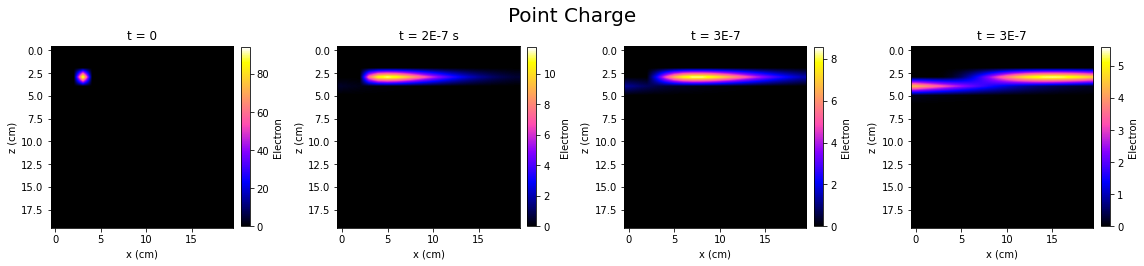

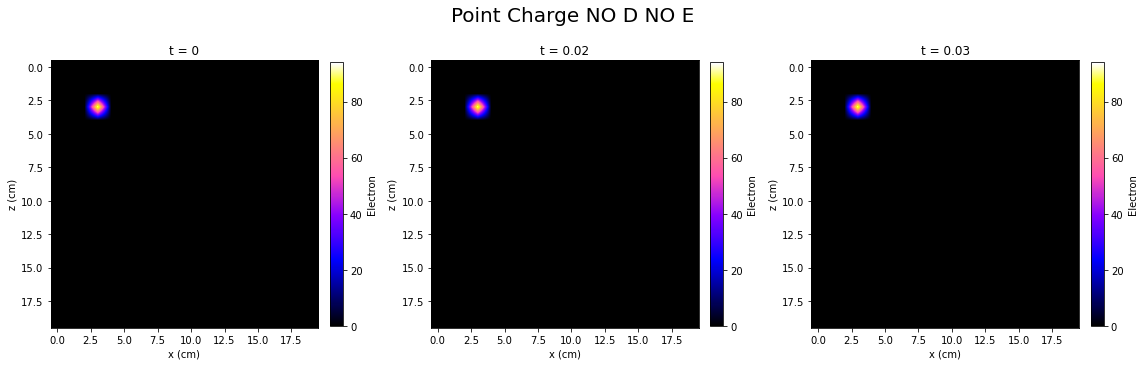

In [21]:
# write some code here to test the functions above
'''Making graphs for point charge distribution under different conditions'''

# 2D distributions for a point charge over a fixed number of time steps 
# under ideal chamber conditons
point_charge = np.zeros((20,20))
point_charge[3,3] = 94
final_pc,shape = solve_diffusion(point_charge, 0.1, 10**5, 0.0000001)

fig2 = plt.figure(figsize=(16,8), tight_layout=True)
fig2.suptitle('Point Charge', size='20', y='0.7')
pc1 = fig2.add_subplot(1,4,1)
bar = pc1.imshow(final_pc[0].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc1.set_xlabel('x (cm)')
pc1.set_ylabel('z (cm)')
pc1.set_title('t = 0')
fig2.colorbar(bar, label="Electron", ax=pc1, fraction=0.045, pad=0.04)

pc2 = fig2.add_subplot(1,4,2)
bar = pc2.imshow(final_pc[2].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc2.set_xlabel('x (cm)')
pc2.set_ylabel('z (cm)')
pc2.set_title('t = 2E-7 s' )
fig2.colorbar(bar, label="Electron", ax=pc2, fraction=0.045, pad=0.04)

pc3 = fig2.add_subplot(1,4,3)
bar = pc3.imshow(final_pc[3].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc3.set_xlabel('x (cm)')
pc3.set_ylabel('z (cm)')
pc3.set_title('t = 3E-7')
fig2.colorbar(bar, label="Electron", ax=pc3, fraction=0.045, pad=0.04)

pc4 = fig2.add_subplot(1,4,4)
bar = pc4.imshow(final_pc[6].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc4.set_xlabel('x (cm)')
pc4.set_ylabel('z (cm)')
pc4.set_title('t = 3E-7')
fig2.colorbar(bar, label="Electron", ax=pc4, fraction=0.045, pad=0.04)

plt.show()


# point charge diffusion distribution for no electric field or diffusion
pc_no,shape = solve_diffusion(point_charge, 0, 0, 0.01)

fig3 = plt.figure(figsize=(16,8), tight_layout=True)
fig3.suptitle('Point Charge NO D NO E', size='20', y='0.8')
pc_no1 = fig3.add_subplot(1,3,1)
bar = pc_no1.imshow(pc_no[0].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc_no1.set_xlabel('x (cm)')
pc_no1.set_ylabel('z (cm)')
pc_no1.set_title('t = 0')
fig3.colorbar(bar, label="Electron", ax=pc_no1, fraction=0.045, pad=0.04)

pc_no2 = fig3.add_subplot(1,3,2)
bar = pc_no2.imshow(pc_no[1].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc_no2.set_xlabel('x (cm)')
pc_no2.set_ylabel('z (cm)')
pc_no2.set_title('t = 0.02' )
fig3.colorbar(bar, label="Electron", ax=pc_no2, fraction=0.045, pad=0.04)

pc_no3 = fig3.add_subplot(1,3,3)
bar = pc_no3.imshow(pc_no[2].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
pc_no3.set_xlabel('x (cm)')
pc_no3.set_ylabel('z (cm)')
pc_no3.set_title('t = 0.03')
fig3.colorbar(bar, label="Electron", ax=pc_no3, fraction=0.045, pad=0.04)
plt.show()



To build the tri-diagonal matrix I made use of the diag function which meant I dictated the position of the recurring values. The matrix is used to track the diffusion and movement of the ionised electrons due to the electric field inside the chamber. 

To solve the matrix equation I used the linalg.solve method and the flatten and reshape to convert the 2D heat map to a 1D row ordered matrix. The individual array rows used for the graphs were reshaped seperately to save run time as there was no need to reshape the entire matrix.

Firstly I tested the ideal conditions for a point charge and tracked the movement as the eletric field pulls it. It tracks well except once reaching the side of the chamber the charge loops round to the other. This is not what would happen in a real life scenario but difficult to correct as its due to the matrix used. Therefore, it is opnly sensible to track the dispersion for a short time as once it starts looping the accuracy decreases (shown in first row of heatmaps).

Secondly, I tested the same point charge for a chamber of which has no diffusion and no electric field and this point charge was station as to be expected as the matrix would not transform anything. Just to prove this I chose larger time steps to test it with.

# Part 4 - Simulating the Drift Chamber

Now use the functions you have defined above to simulate the full process :
* a cosmic muon entering the drift chamber
* the initial charge distribution resulting from that cosmic muon
* the charge drifting, and diffusing, under the influence of the electric field

Run these steps for at least one cosmic ray muon, and plot the results in an appropriate format.

In [22]:
# run functions from parts 1-3 here to simulate the passage of a cosmic ray through the detector and subsequnet charge drift
'''Create muon simulation'''

heatmap2 = np.zeros((w,d))
grid, bar = create_plot(heatmap2)
muon_diffusion,shape = solve_diffusion(grid, 0.1, 10**5, 0.00000001)


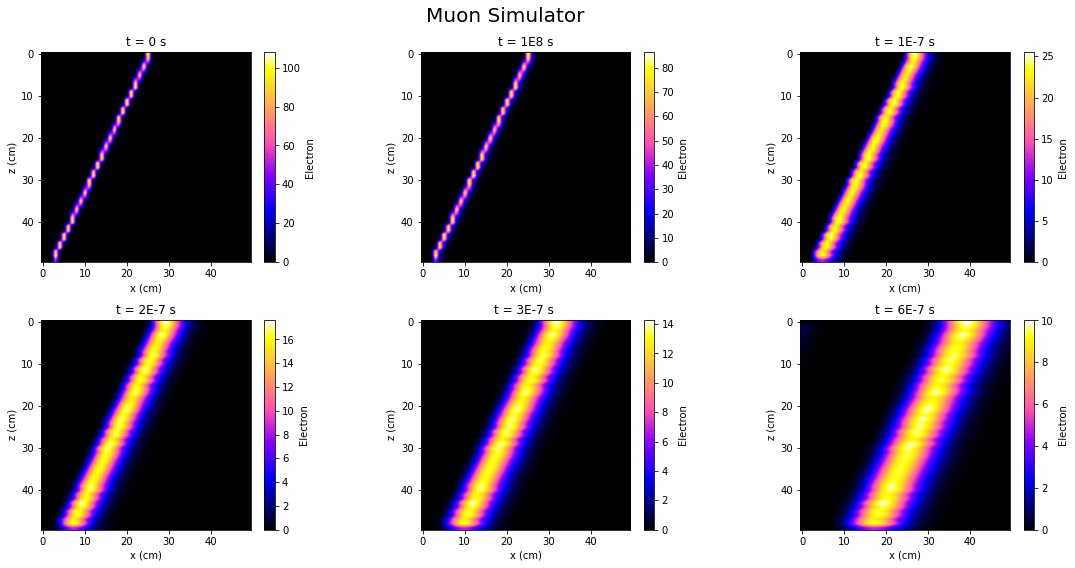

In [23]:
'''Graphs for muon simulation'''

fig5 = plt.figure(figsize=(16,8), tight_layout=True)
fig5.suptitle('Muon Simulator', size='20')
ms1 = fig5.add_subplot(2,3,1)
bar = ms1.imshow(muon_diffusion[0].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms1.set_xlabel('x (cm)')
ms1.set_ylabel('z (cm)')
ms1.set_title('t = 0 s')
fig5.colorbar(bar, label="Electron", ax=ms1, fraction=0.045, pad=0.04)

ms2 = fig5.add_subplot(2,3,2)
bar = ms2.imshow(muon_diffusion[1].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms2.set_xlabel('x (cm)')
ms2.set_ylabel('z (cm)')
ms2.set_title('t = 1E8 s' )
fig5.colorbar(bar, label="Electron", ax=ms2, fraction=0.045, pad=0.04)

ms3 = fig5.add_subplot(2,3,3)
bar = ms3.imshow(muon_diffusion[10].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms3.set_xlabel('x (cm)')
ms3.set_ylabel('z (cm)')
ms3.set_title('t = 1E-7 s')
fig5.colorbar(bar, label="Electron", ax=ms3, fraction=0.045, pad=0.04)

ms4 = fig5.add_subplot(2,3,4)
bar = ms4.imshow(muon_diffusion[20].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms4.set_xlabel('x (cm)')
ms4.set_ylabel('z (cm)')
ms4.set_title('t = 2E-7 s')
fig5.colorbar(bar, label="Electron", ax=ms4, fraction=0.045, pad=0.04)

ms5 = fig5.add_subplot(2,3,5)
bar = ms5.imshow(muon_diffusion[30].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms5.set_xlabel('x (cm)')
ms5.set_ylabel('z (cm)')
ms5.set_title('t = 3E-7 s ')
fig5.colorbar(bar, label="Electron", ax=ms5, fraction=0.045, pad=0.04)

ms6 = fig5.add_subplot(2,3,6)
bar = ms6.imshow(muon_diffusion[60].reshape(shape),cmap='gnuplot2',interpolation='bilinear')
ms6.set_xlabel('x (cm)')
ms6.set_ylabel('z (cm)')
ms6.set_title('t = 6E-7 s')
fig5.colorbar(bar, label="Electron", ax=ms6, fraction=0.045, pad=0.04)
plt.show()

The above bit of code runs the previous sections by creating a new grid to put the heatmap into. It then generates a random muon path and then uses the matrix equation to generate the time steps the same as before. 

I have displayed it through a range of times steps with the ideal chamber conditons of E = 1E5 and D = 0.1 with a time step of 1E8 s as the time step to show the progession through the chamber. It shows the diffusion of the charge and as it progresses when comparing with the colour bar it shows dthat the max intensity reduces there electron distribution becomes less intense. It is also follows the same issue as before when overlapping the chamber on exit which is not ideal.